## Numerical Classification of Delays

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def categorize_flight_delays(file_path):
    """
    Categorizes flight delays into specified time intervals and prints statistics.
    
    Parameters:
        file_path (str): The path to the flights.csv file.
    """
    # Load the CSV file into a Pandas DataFrame
    flights = pd.read_csv(file_path)
    
    # Ensure the 'dep_delay' column is numeric
    flights['dep_delay'] = pd.to_numeric(flights['dep_delay'], errors='coerce')
    
    # Remove rows with missing 'dep_delay' values
    flights = flights.dropna(subset=['dep_delay'])
    
    # Categorize delays
    delay_intervals = {
        "On Time": flights['dep_delay'] <= 0,
        "0-30 mins": (flights['dep_delay'] > 0) & (flights['dep_delay'] <= 60),
        "30 mins - 1 hour": (flights['dep_delay'] > 30) & (flights['dep_delay'] <= 60),
        "1-2 hours": (flights['dep_delay'] > 60) & (flights['dep_delay'] <= 120),
        "2-3 hours": (flights['dep_delay'] > 120) & (flights['dep_delay'] <= 180),
        "Over 3 hours": flights['dep_delay'] > 180
    }
    
    # Count occurrences in each category
    counts = {category: flights[condition].shape[0] for category, condition in delay_intervals.items()}
    
    # Print the results
    print("Flight Delay Categories:")
    for category, count in counts.items():
        print(f"{category}: {count}")

# Usage
file_path = "flights.csv"  # Replace with the path to your CSV file
categorize_flight_delays(file_path)

Flight Delay Categories:
On Time: 200089
0-30 mins: 101851
30 mins - 1 hour: 21710
1-2 hours: 16858
2-3 hours: 5830
Over 3 hours: 3893


## Graph of Delays by Category

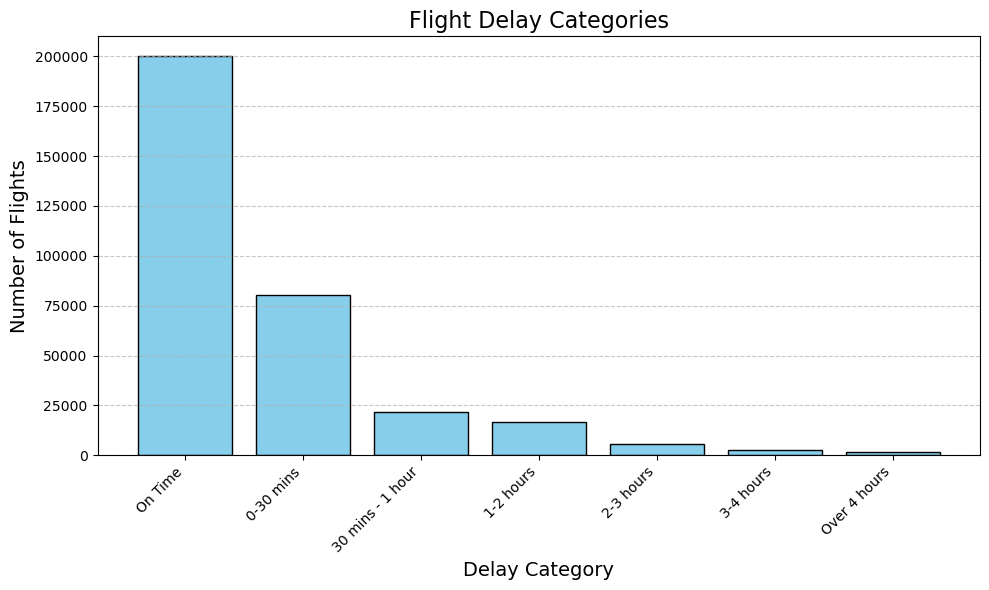

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_flight_delays(file_path):
    """
    Visualizes flight delays by categorizing them into specified time intervals.
    
    Parameters:
        file_path (str): The path to the flights.csv file.
    """
    # Load the CSV file into a Pandas DataFrame
    flights = pd.read_csv(file_path)
    
    # Ensure the 'dep_delay' column is numeric
    flights['dep_delay'] = pd.to_numeric(flights['dep_delay'], errors='coerce')
    
    # Remove rows with missing 'dep_delay' values
    flights = flights.dropna(subset=['dep_delay'])
    
    # Categorize delays
    delay_intervals = {
        "On Time": flights['dep_delay'] <= 0,
        "0-30 mins": (flights['dep_delay'] > 0) & (flights['dep_delay'] <= 30),
        "30 mins - 1 hour": (flights['dep_delay'] > 30) & (flights['dep_delay'] <= 60),
        "1-2 hours": (flights['dep_delay'] > 60) & (flights['dep_delay'] <= 120),
        "2-3 hours": (flights['dep_delay'] > 120) & (flights['dep_delay'] <= 180),
        "3-4 hours": (flights['dep_delay'] > 180) & (flights['dep_delay'] <= 240),
        "Over 4 hours": flights['dep_delay'] > 240
    }
    
    # Count occurrences in each category
    counts = {category: flights[condition].shape[0] for category, condition in delay_intervals.items()}
    
    # Create a bar chart
    categories = list(counts.keys())
    values = list(counts.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(categories, values, color='skyblue', edgecolor='black')
    plt.title("Flight Delay Categories", fontsize=16)
    plt.xlabel("Delay Category", fontsize=14)
    plt.ylabel("Number of Flights", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Usage
file_path = "flights.csv"  # Replace with the path to your CSV file
visualize_flight_delays(file_path)
